In [ ]:
!pip install noise -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


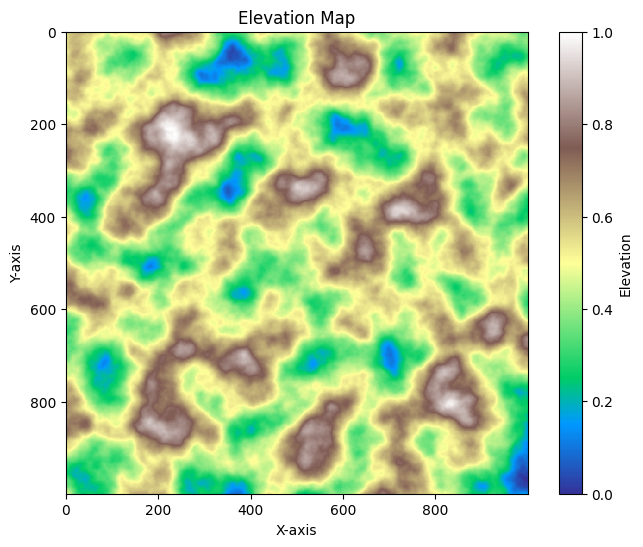

In [ ]:
import noise
import numpy as np
import matplotlib.pyplot as plt

# Define map dimensions
width = 1000
height = 1000

# Generate empty elevation map
elevation_map = np.zeros((height, width))

# Generate Perlin noise to create elevation values
scale = 150.0  # Adjust this to change the "roughness" of the terrain
octaves = 6    # Number of levels of detail in the Perlin noise
persistence = 0.4  # Influence of each octave on the overall shape

for y in range(height):
    for x in range(width):
        value = noise.pnoise2(x / scale,
                              y / scale,
                              octaves=octaves,
                              persistence=persistence,
                              lacunarity=2.0,
                              repeatx=1024,
                              repeaty=1024,
                              base=0)
        elevation_map[y][x] = value

# Plot the elevation map
plt.figure(figsize=(8, 6))
plt.imshow((elevation_map - np.min(elevation_map))/(np.max(elevation_map) - np.min(elevation_map)), cmap='terrain', interpolation='nearest')
plt.colorbar(label='Elevation')
plt.title('Elevation Map')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


In [ ]:
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 21.3 MB/s eta 0:00:00


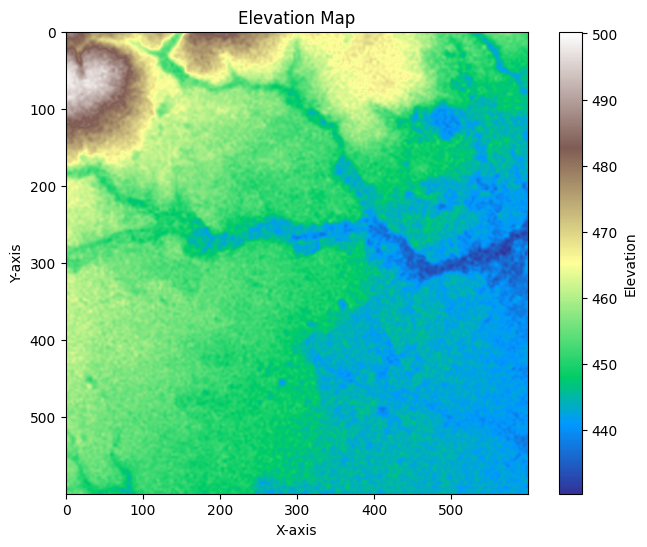

In [ ]:
import rasterio
from rasterio.plot import show

# Path to your GeoTIFF file containing elevation data
file_path = '/content/11S45_ZN.tif'

# Open the GeoTIFF file
with rasterio.open(file_path) as src:
    # Read the elevation data as a numpy array
    elevation = src.read(1)  # Assuming it's a single-band raster

    # Visualize the elevation map
    plt.figure(figsize=(8, 6))
    plt.imshow(elevation[1200:1800, 1200:1800], cmap='terrain')
    plt.colorbar(label='Elevation')
    plt.title('Elevation Map')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()
